In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\udayu\Downloads\medical_costs.csv")
df.head()

,Age,Sex,BMI,Children,Smoker,Region,Medical Cost
0,58,male,15.6,2,yes,northwest,17907.54
1,24,male,29.8,0,yes,northeast,16312.64
2,50,male,29.0,5,no,northwest,6819.21
3,35,male,34.0,1,no,southeast,5247.87
4,31,female,17.6,3,yes,southeast,17525.49


In [3]:
eda_df = df.copy()

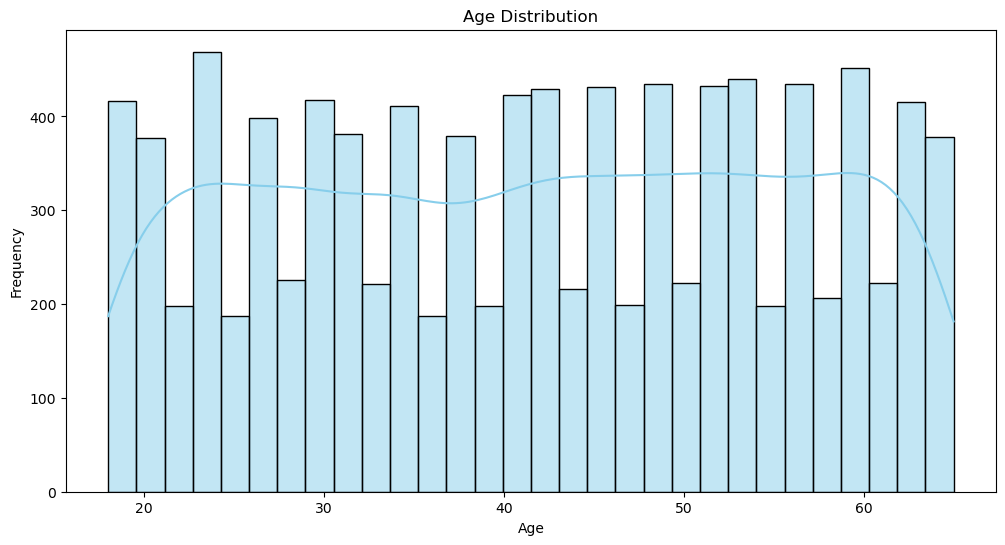

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_df['Age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

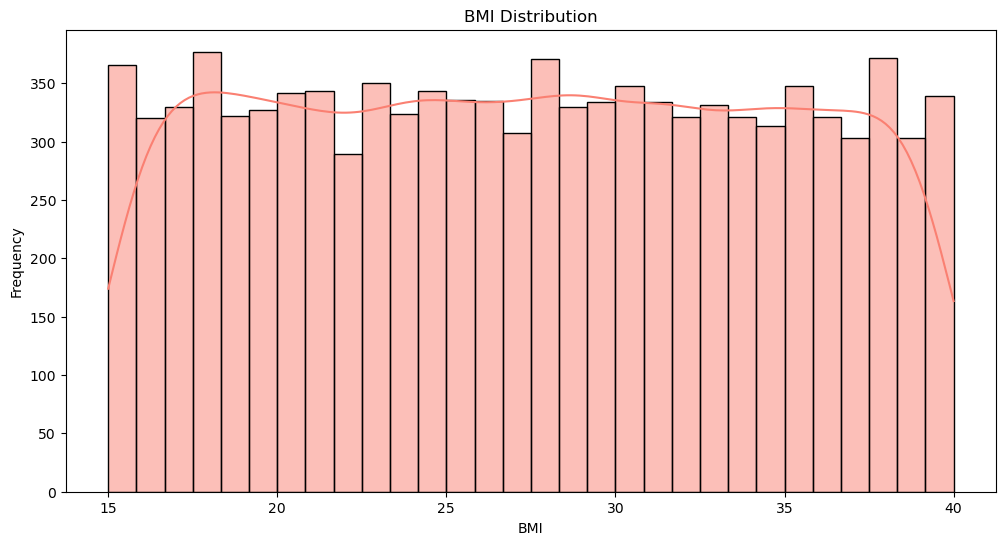

In [5]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_df['BMI'], bins=30, kde=True, color='salmon')
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

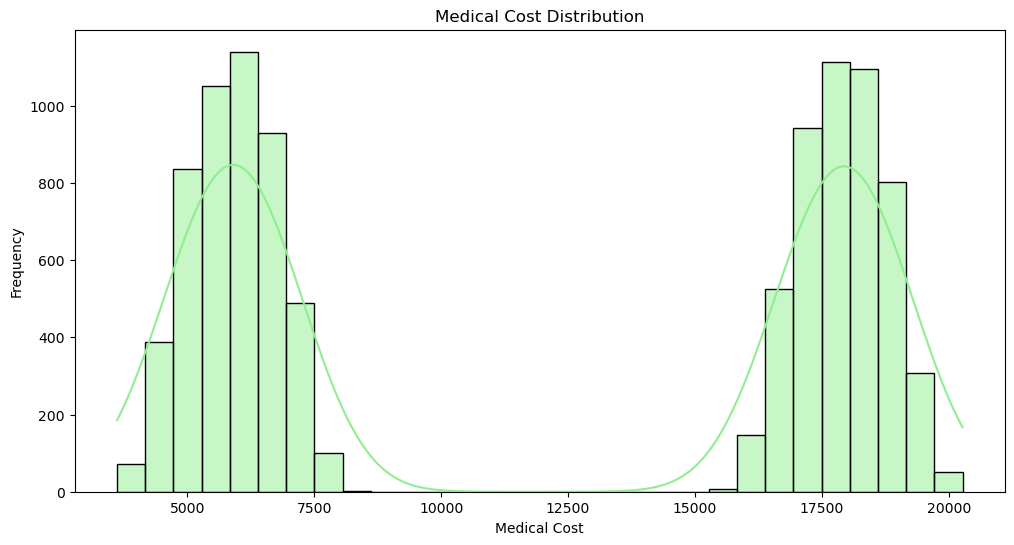

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(eda_df['Medical Cost'], bins=30, kde=True, color='lightgreen')
plt.title("Medical Cost Distribution")
plt.xlabel("Medical Cost")
plt.ylabel("Frequency")
plt.show()

In [7]:
df.shape

(10000, 7)

In [8]:
df.describe()

,Age,BMI,Children,Medical Cost
count,10000.000000,10000.00000,10000.000000,10000.000000
mean,41.678400,27.40301,2.501700,11898.932216
std,13.807724,7.22896,1.701672,6073.875834
min,18.000000,15.00000,0.000000,3617.090000
25%,30.000000,21.10000,1.000000,5909.925000
50%,42.000000,27.40000,2.000000,7957.430000
75%,54.000000,33.70000,4.000000,17931.962500
max,65.000000,40.00000,5.000000,20268.210000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           10000 non-null  int64  
 1   Sex           10000 non-null  object 
 2   BMI           10000 non-null  float64
 3   Children      10000 non-null  int64  
 4   Smoker        10000 non-null  object 
 5   Region        10000 non-null  object 
 6   Medical Cost  10000 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 547.0+ KB


In [10]:
df.isnull().sum()

Age             0
Sex             0
BMI             0
Children        0
Smoker          0
Region          0
Medical Cost    0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.columns= df.columns.str.lower().str.replace(' ', '_')

In [13]:
df['sex'].value_counts()

sex
female    5034
male      4966
Name: count, dtype: int64

In [14]:
df['sex']= df['sex'].astype('str').apply(lambda x: 1 if x=='female' else 0)
df['sex'].value_counts()

sex
1    5034
0    4966
Name: count, dtype: int64

In [15]:
df['smoker'].value_counts()

smoker
no     5008
yes    4992
Name: count, dtype: int64

In [16]:
df['smoker']= df['smoker'].astype('str').apply(lambda x:1 if x== 'yes' else 0)
df['smoker'].value_counts()

smoker
0    5008
1    4992
Name: count, dtype: int64

In [17]:
df['region'].value_counts()

region
southwest    2521
northeast    2514
northwest    2486
southeast    2479
Name: count, dtype: int64

In [18]:
df= df.join(pd.get_dummies(df['region'], prefix='reg').astype('int'))
df

,age,sex,bmi,children,smoker,region,medical_cost,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,58,0,15.6,2,1,northwest,17907.54,0,1,0,0
1,24,0,29.8,0,1,northeast,16312.64,1,0,0,0
2,50,0,29.0,5,0,northwest,6819.21,0,1,0,0
3,35,0,34.0,1,0,southeast,5247.87,0,0,1,0
4,31,1,17.6,3,1,southeast,17525.49,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,24,1,26.9,2,1,southeast,16551.53,0,0,1,0
9996,49,1,33.4,3,0,northeast,6376.05,1,0,0,0
9997,52,1,38.1,5,1,northwest,18760.27,0,1,0,0
9998,24,0,33.4,4,0,northwest,5471.91,0,1,0,0


In [19]:
df.dtypes

age                int64
sex                int64
bmi              float64
children           int64
smoker             int64
region            object
medical_cost     float64
reg_northeast      int32
reg_northwest      int32
reg_southeast      int32
reg_southwest      int32
dtype: object

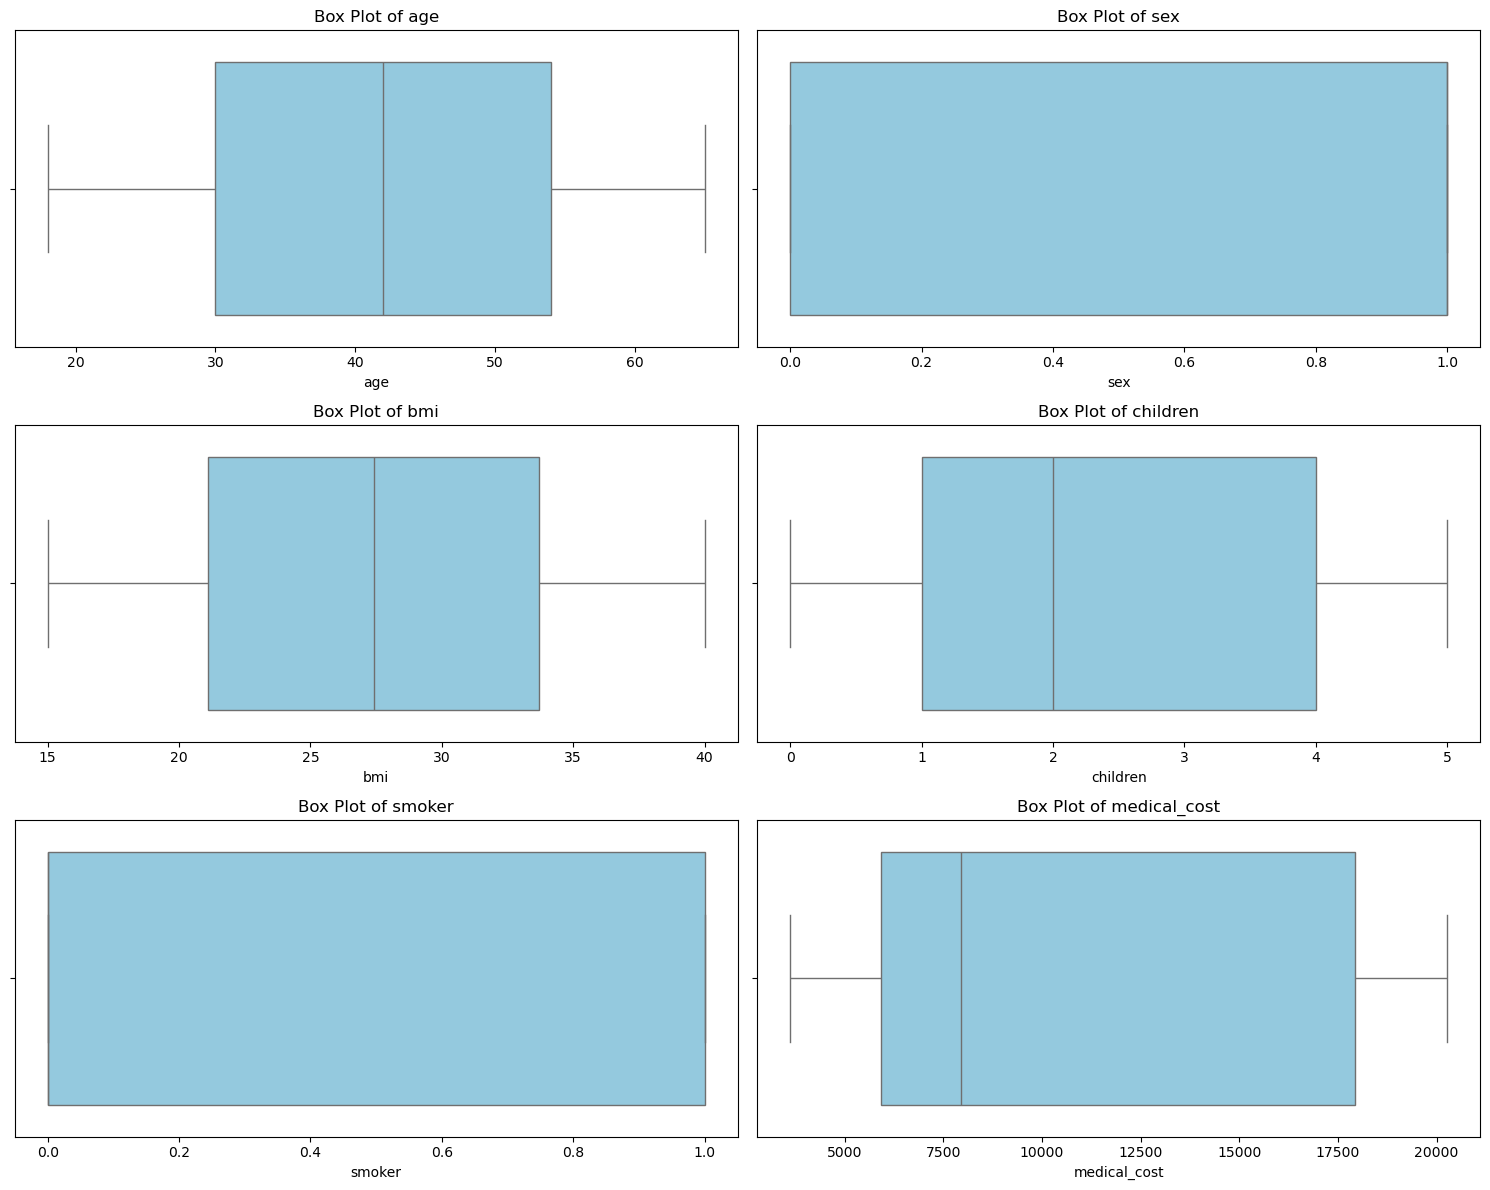

In [20]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(df.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()

In [21]:
def low_up(df, col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3 - q1
    lower= q1 - 1.5*iqr
    upper= q3 + 1.5*q1
    return lower, upper
def check_outlier(df, col):
    l, u= low_up(df, col)
    return df[(df[col]< l) | (df[col] > u)].any()
def remove_outlier(df, col):
    return df[(df[col]>= l) & (df[col]<= u)]

In [22]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'medical_cost',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest'],
      dtype='object')

In [23]:
cols= ['age', 'sex', 'bmi', 'children', 'smoker', 'medical_cost',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest']
for i in cols:
    print(i, " ", check_outlier(df, i).any())

age   False
sex   False
bmi   False
children   False
smoker   False
medical_cost   False
reg_northeast   False
reg_northwest   True
reg_southeast   True
reg_southwest   False


In [24]:
df.drop(['region'], axis=1, inplace= True)

In [25]:
cols= ['age', 'sex', 'bmi', 'children', 'smoker', 'medical_cost',
       'reg_northeast', 'reg_northwest', 'reg_southeast', 'reg_southwest']
for i in cols:
    print(i, " ", check_outlier(df, i).any())

age   False
sex   False
bmi   False
children   False
smoker   False
medical_cost   False
reg_northeast   False
reg_northwest   True
reg_southeast   True
reg_southwest   False


In [26]:
df.corr().style.background_gradient(cmap='coolwarm')

,age,sex,bmi,children,smoker,medical_cost,reg_northeast,reg_northwest,reg_southeast,reg_southwest
age,1.000000,0.004142,-0.005848,-0.004944,0.012319,0.125649,-0.013999,0.011940,0.001128,0.000980
sex,0.004142,1.000000,0.002566,-0.010997,0.002811,0.003113,-0.002558,0.003955,0.003739,-0.005100
bmi,-0.005848,0.002566,1.000000,0.014562,0.000436,0.035249,0.023946,-0.005537,-0.015300,-0.003198
children,-0.004944,-0.010997,0.014562,1.000000,0.013107,0.069575,0.006601,-0.010501,0.002217,0.001653
smoker,0.012319,0.002811,0.000436,0.013107,1.000000,0.990141,0.001388,-0.004633,0.010414,-0.007132
medical_cost,0.125649,0.003113,0.035249,0.069575,0.990141,1.000000,0.001480,-0.003872,0.009594,-0.007166
reg_northeast,-0.013999,-0.002558,0.023946,0.006601,0.001388,0.001480,1.000000,-0.333329,-0.332704,-0.336451
reg_northwest,0.011940,0.003955,-0.005537,-0.010501,-0.004633,-0.003872,-0.333329,1.000000,-0.330229,-0.333949
reg_southeast,0.001128,0.003739,-0.015300,0.002217,0.010414,0.009594,-0.332704,-0.330229,1.000000,-0.333323
reg_southwest,0.000980,-0.005100,-0.003198,0.001653,-0.007132,-0.007166,-0.336451,-0.333949,-0.333323,1.000000


In [27]:
df.head()

,age,sex,bmi,children,smoker,medical_cost,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,58,0,15.6,2,1,17907.54,0,1,0,0
1,24,0,29.8,0,1,16312.64,1,0,0,0
2,50,0,29.0,5,0,6819.21,0,1,0,0
3,35,0,34.0,1,0,5247.87,0,0,1,0
4,31,1,17.6,3,1,17525.49,0,0,1,0


In [28]:
X = df.drop(columns='medical_cost')
Y = df['medical_cost']

In [29]:
X.head()

,age,sex,bmi,children,smoker,reg_northeast,reg_northwest,reg_southeast,reg_southwest
0,58,0,15.6,2,1,0,1,0,0
1,24,0,29.8,0,1,1,0,0,0
2,50,0,29.0,5,0,0,1,0,0
3,35,0,34.0,1,0,0,0,1,0
4,31,1,17.6,3,1,0,0,1,0


In [30]:
Y.head()

0    17907.54
1    16312.64
2     6819.21
3     5247.87
4    17525.49
Name: medical_cost, dtype: float64

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [32]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
}

In [33]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mae = mean_absolute_error(Y_test, Y_pred)
    mse = mean_squared_error(Y_test, Y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(Y_test, Y_pred)
    results[model_name] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R^2 Score': r2
    }

In [34]:
results_df = pd.DataFrame(results).T
print(results_df)

                          MAE            MSE        RMSE  R^2 Score
Linear Regression  252.938623   84926.735188  291.421920   0.997690
Decision Tree      346.333280  180158.625566  424.450970   0.995099
Random Forest      273.825548  105118.242899  324.219436   0.997140
Gradient Boosting  254.922714   86941.995312  294.859281   0.997635
